# Tubulin AID

Optimal tau: 59.638278109114864
Calculated t_half: 41.338104324782876
R^2: 0.980619100829699
3.780e-10
At X = 110, Y (from original data) = 0.8490


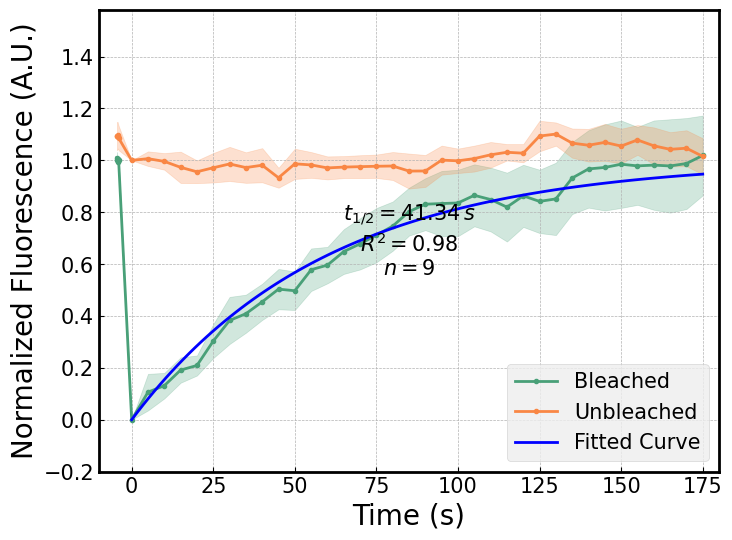

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/Users/zouyuntong/Desktop/FRAP Curve Plotting Data/newest SMW80 AID 3minutes/SMW80_AID_Plotting_Bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/Users/zouyuntong/Desktop/FRAP Curve Plotting Data/newest SMW80 AID 3minutes/SMW80_AID_Plotting_Unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)
print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")


# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 180)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()



Optimal tau: 60.33303694744654
Calculated t_half: 41.81967445474157
R^2: 0.9810745230027802
3.736e-10
At X = 170, Y (from original data) = 0.9877


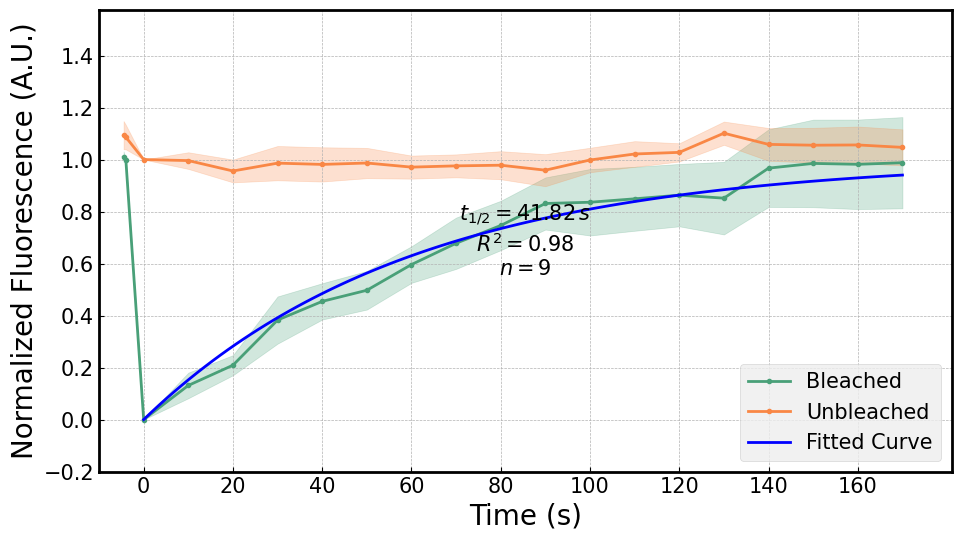

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/Users/zouyuntong/Desktop/FRAP Curve Plotting Data/newest SMW80 AID 3minutes/SMW80_AID_Plotting_Bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/Users/zouyuntong/Desktop/FRAP Curve Plotting Data/newest SMW80 AID 3minutes/SMW80_AID_Plotting_Unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)

y_value_at_170 = np.interp(170, x_bleached, mean_values_bleached)

print(f"At X = 170, Y (from original data) = {y_value_at_170:.4f}")

# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(11, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 181)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 180, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()



# Tubulin Non AID

Optimal tau: 26.51279084707379
Calculated t_half: 18.377266224424723
R^2: 0.9696447190861086
8.502e-10


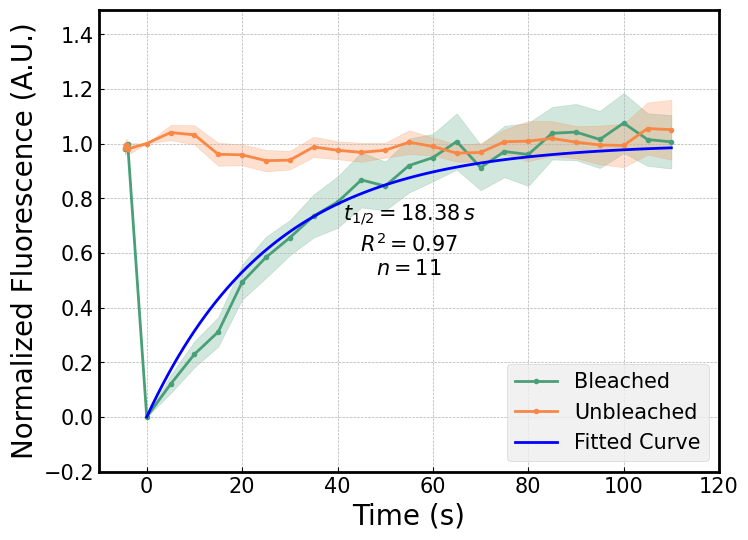

At X = 110, Y (from original data) = 1.0060


In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Tubulin NON AID/SMW80_NONAID_Plotting_Bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Tubulin NON AID/SMW80_NONAID_Plotting_Unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)


# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()

y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 26.97566418672429
Calculated t_half: 18.698105574759833
R^2: 0.9783996953827329
8.356e-10


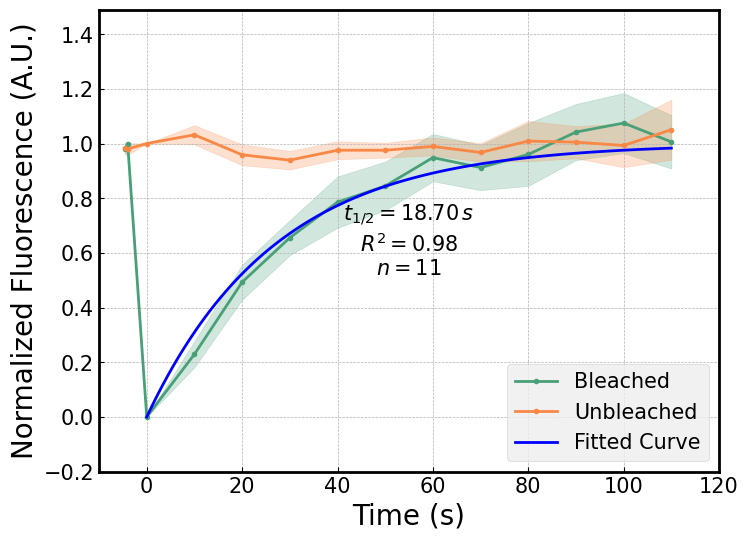

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Tubulin NON AID/SMW80_NONAID_Plotting_Bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Tubulin NON AID/SMW80_NONAID_Plotting_Unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)


# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()



# ZYG-9

Optimal tau: 23.79804851965934
Calculated t_half: 16.495550234230652
R^2: 0.9791637351729992
9.472e-10


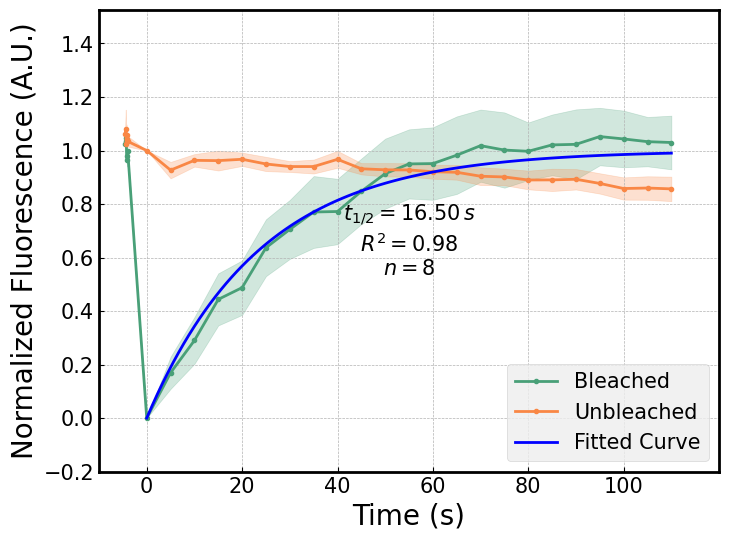

At X = 110, Y (from original data) = 1.0299


In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/Users/zouyuntong/Desktop/FRAP Curve Plotting Data/newest SMW33 /newest_SMW33_plotting_bleached.xlsx' 
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW33 /new_SMW33_Plotting_Unbleached_1.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)

# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()


y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 24.54634664236808
Calculated t_half: 17.01423096820451
R^2: 0.9797202364417436
9.183e-10


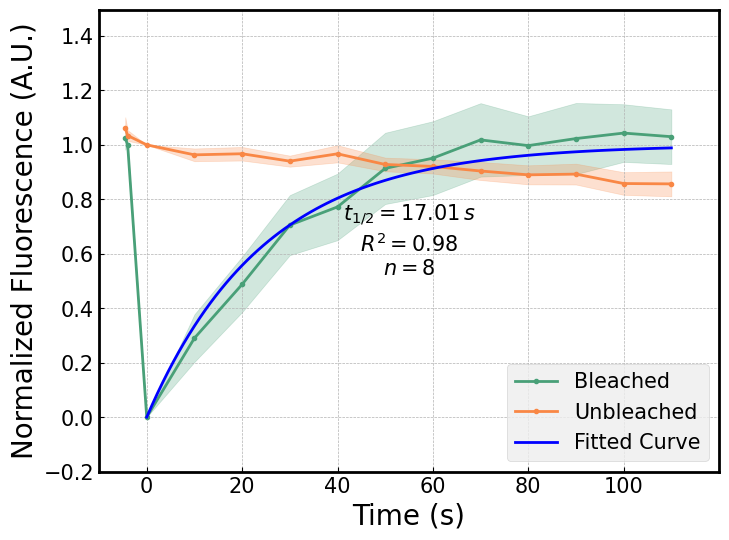

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW33 /newest_SMW33_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW33 /newest_SMW33_Plotting_Unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)


# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# Dynein

Optimal tau: 56.8595723654207
Calculated t_half: 39.41205227293554
R^2: 0.9873940237400293
3.965e-10


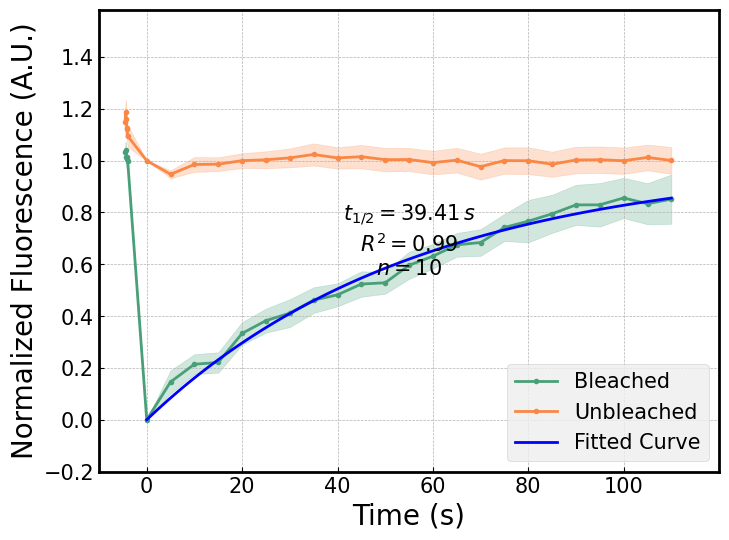

At X = 110, Y (from original data) = 0.8515


In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Dynein/newest_FRAP_dynein_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Dynein/newest_FRAP_dynein_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)

# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()


y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 57.10298683355603
Calculated t_half: 39.58077432523104
R^2: 0.9865879260270998
3.948e-10


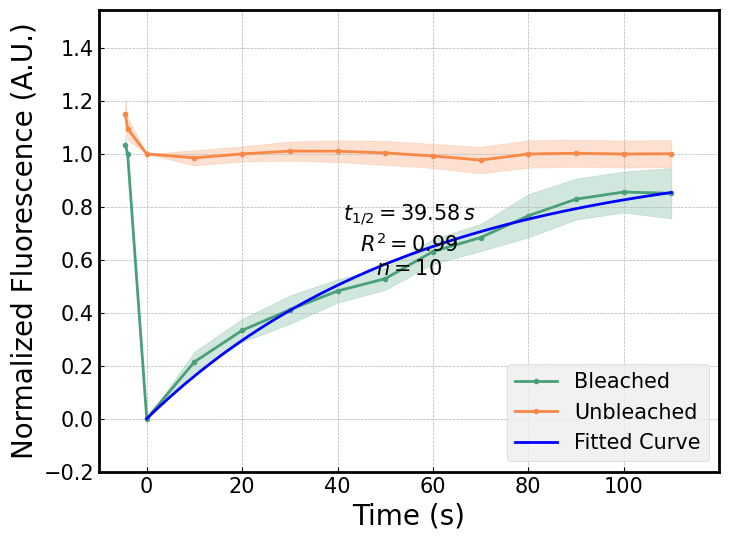

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Dynein/newest_FRAP_dynein_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest Dynein/newest_FRAP_dynein_plotting_unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")

D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)

# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# ASPM-1

Optimal tau: 79.03895956955849
Calculated t_half: 54.78563198003097
R^2: 0.9743308834453998
2.852e-10


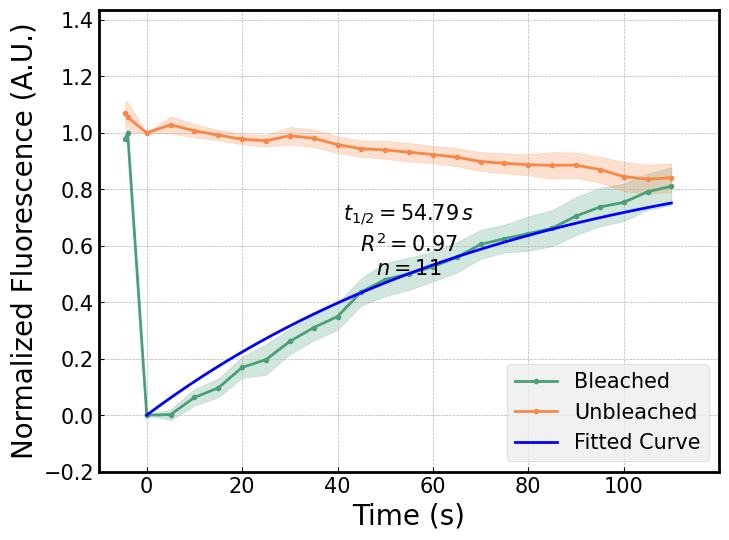

At X = 110, Y (from original data) = 0.8106


In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW75/newest_FRAP_ASPM1_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW75/newest_FRAP_ASPM1_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)

# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()



y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 78.54436608114823
Calculated t_half: 54.44280589801609
R^2: 0.9791981013317402
2.870e-10


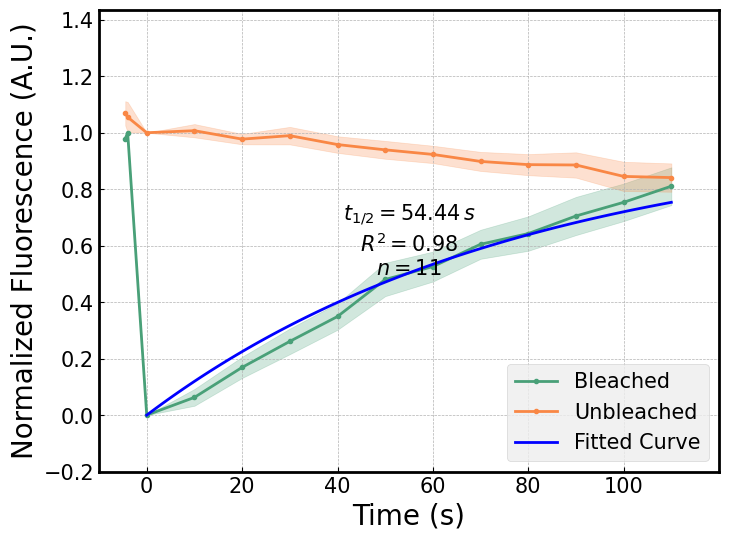

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW75/newest_FRAP_ASPM1_plotting_unbleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest SMW75/newest_FRAP_ASPM1_plotting_bleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# KLP7 Anaphase

Optimal tau: 63.11790099715559
Calculated t_half: 43.74999511904016
R^2: 0.9811009430061748
3.571e-10


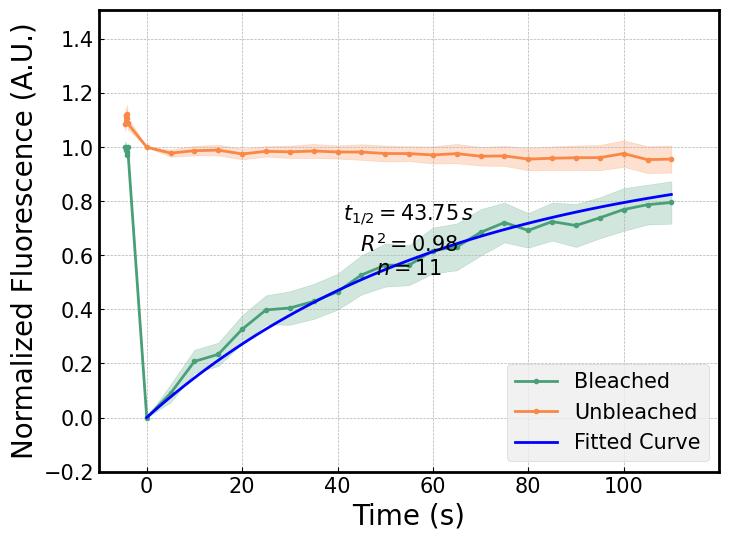

At X = 110, Y (from original data) = 0.7953


In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Anaphase_Chromosome_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Anaphase_Chromosome_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()



y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 63.33625965807545
Calculated t_half: 43.9013498092076
R^2: 0.9809862570747879
3.559e-10


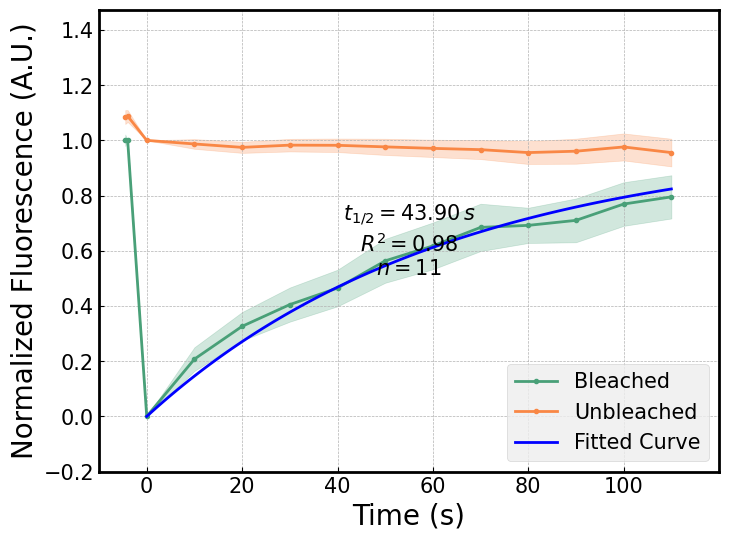

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Anaphase_Chromosome_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Anaphase_Chromosome_plotting_unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# KLP7 Metaphase Pole

Optimal tau: 31.365092114827707
Calculated t_half: 21.740625167395798
R^2: 0.9459573294904321
7.187e-10


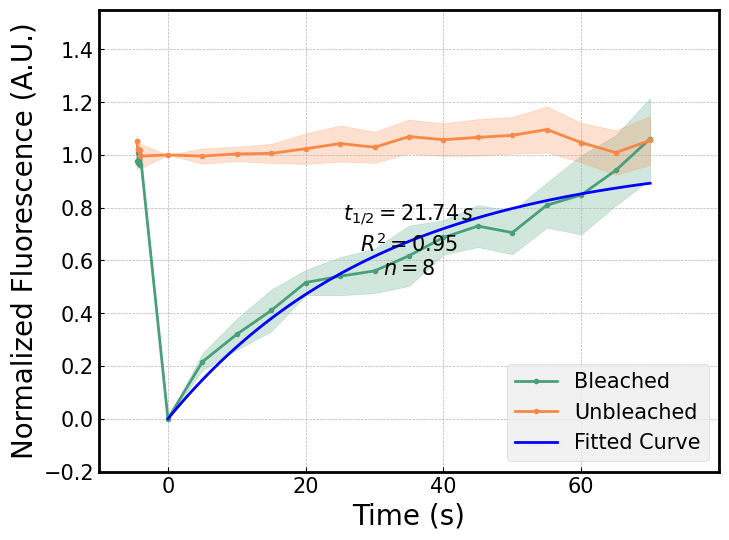

At X =70, Y (from original data) = 1.0611


In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Pole_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Pole_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 80)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 80, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()


y_value_at_70 = np.interp(70, x_bleached, mean_values_bleached)

print(f"At X =70, Y (from original data) = {y_value_at_70:.4f}")

Optimal tau: 31.20713166717287
Calculated t_half: 21.63113532846386
R^2: 0.938821118734475
7.223e-10


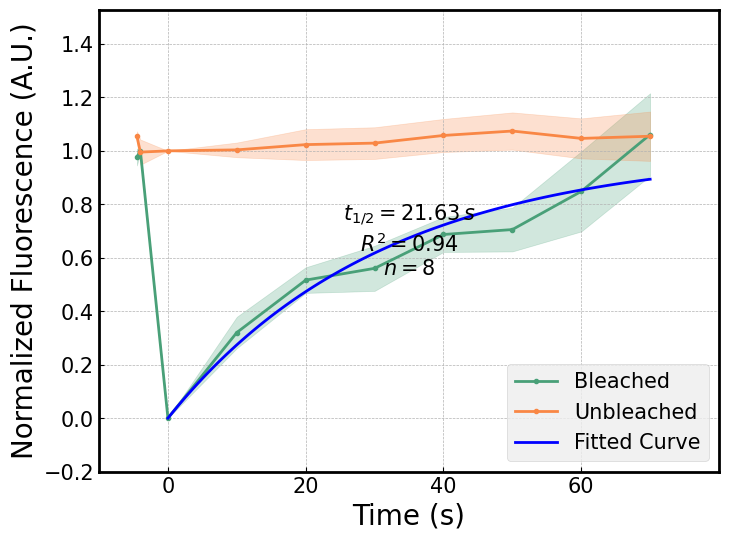

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Pole_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Pole_plotting_unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 80)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 80, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# KLP7 Metaphase Chromosome

Optimal tau: 55.34252574476859
Calculated t_half: 38.36051568505253
R^2: 0.9859029654416938
4.073e-10


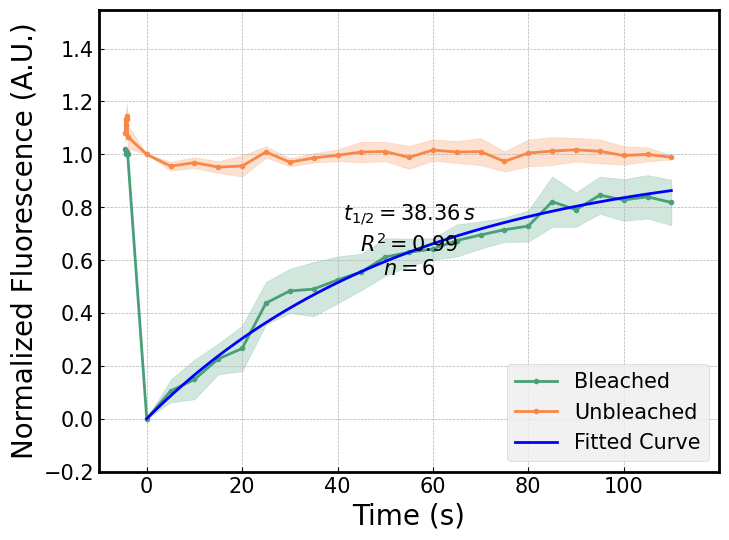

At X = 110, Y (from original data) = 0.8180


In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Chromosome_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Chromosome_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()

y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")


Optimal tau: 56.82362464888839
Calculated t_half: 39.3871352145736
R^2: 0.9878667646239501
3.967e-10


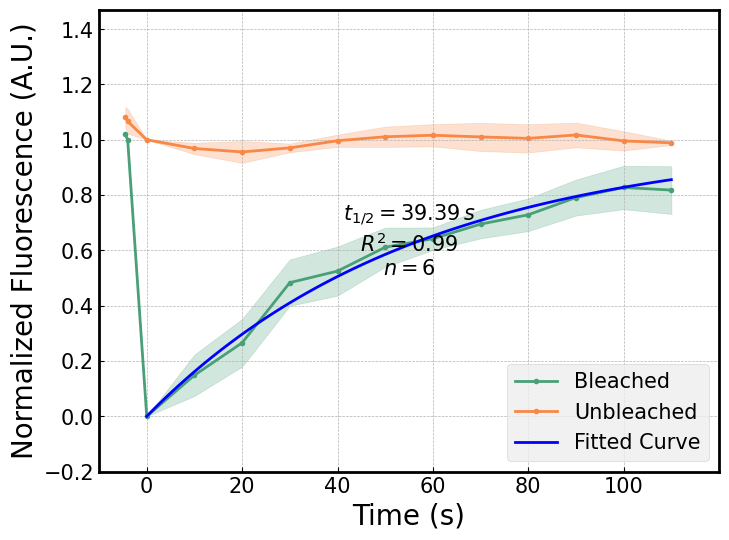

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Chromosome_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Metaphase_Chromosome_plotting_unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




# KLP7 Prometaphase

Optimal tau: 53.69202985695216
Calculated t_half: 37.21647911388679
R^2: 0.9854445542644066
4.198e-10


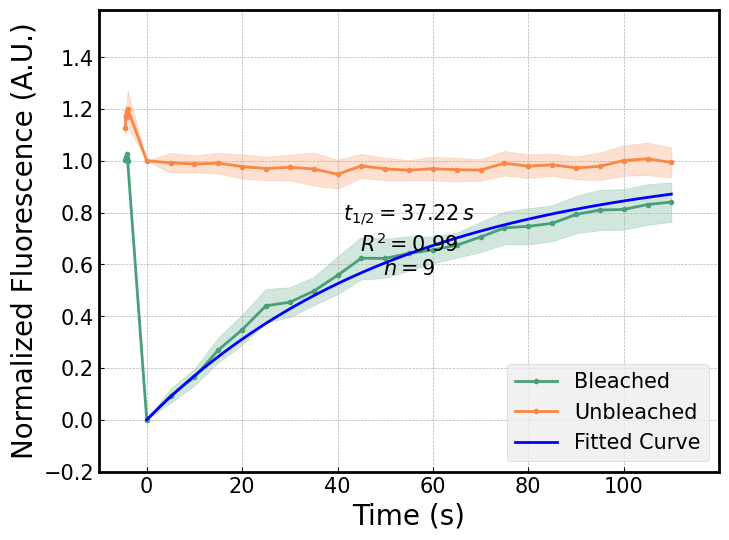

At X = 110, Y (from original data) = 0.8405


In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Premetaphase_Chromosome_plotting_bleached.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Premetaphase_Chromosome_plotting_unbleached.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()


y_value_at_110 = np.interp(110, x_bleached, mean_values_bleached)

print(f"At X = 110, Y (from original data) = {y_value_at_110:.4f}")

Optimal tau: 54.37270896113057
Calculated t_half: 37.688289915814124
R^2: 0.9908816392798011
4.146e-10


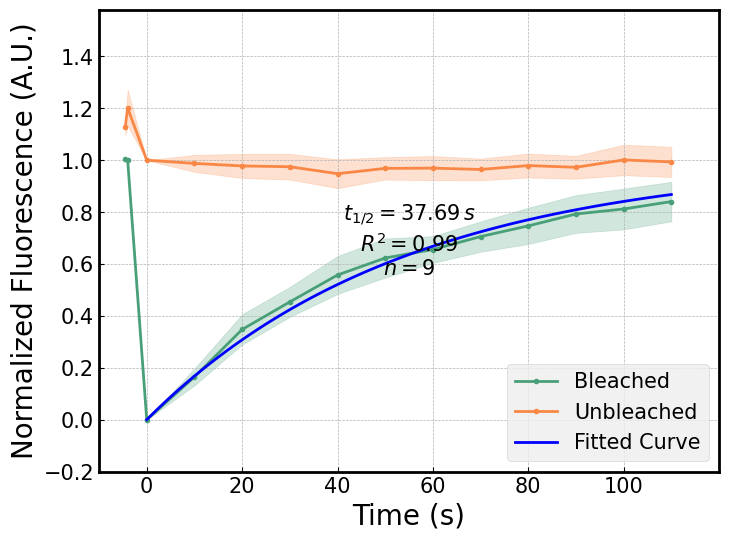

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import optimize

# Load dataset I (Bleached)
excel_path_bleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Premetaphase_Chromosome_plotting_bleached_simple.xlsx'
df_bleached = pd.read_excel(excel_path_bleached)
x_bleached = df_bleached['Time']
numeric_cols_bleached = df_bleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_bleached = df_bleached[numeric_cols_bleached].mean(axis=1)
std_error_bleached = df_bleached[numeric_cols_bleached].std(axis=1) / np.sqrt(len(numeric_cols_bleached))

# Load dataset II (Unbleached)
excel_path_unbleached = '/users/zouyuntong/desktop/FRAP Curve Plotting Data/newest KLP7/newest_FRAP_KLP7_Premetaphase_Chromosome_plotting_unbleached_simple.xlsx'
df_unbleached = pd.read_excel(excel_path_unbleached)
x_unbleached = df_unbleached['Time']
numeric_cols_unbleached = df_unbleached.select_dtypes(include=[np.number]).drop('Time', axis=1).columns
mean_values_unbleached = df_unbleached[numeric_cols_unbleached].mean(axis=1)
std_error_unbleached = df_unbleached[numeric_cols_unbleached].std(axis=1) / np.sqrt(len(numeric_cols_unbleached))
# Fit the curve
def f(t, tau):
    return 1 - np.exp(-t / tau)

# Initial guesses for parameters
initial_guesses = [40]  # Adjusting initial guess for tau

# Filter data points where x_bleached >= 0
filtered_indices = x_bleached >= 0
x_bleached_filtered = x_bleached[filtered_indices].reset_index(drop=True)
mean_values_bleached_filtered = mean_values_bleached[filtered_indices].reset_index(drop=True)

# Fit dataset I with filtered data
popt, pcov = optimize.curve_fit(f, x_bleached_filtered, mean_values_bleached_filtered, p0=initial_guesses)
tau = popt[0]

# Calculate t_half for the new formula
t_for_y_half = -tau * np.log(0.5)

# Calculate R^2 value using a loop for filtered data
mean_y = np.mean(mean_values_bleached_filtered)
ss_tot = 0
ss_res = 0

for i in range(len(x_bleached_filtered)):
    y_observed = mean_values_bleached_filtered[i]
    y_predicted = f(x_bleached_filtered[i], tau)
    ss_tot += (y_observed - mean_y) ** 2
    ss_res += (y_observed - y_predicted) ** 2

r_squared = 1 - (ss_res / ss_tot)

# Debugging output
print(f"Optimal tau: {tau}")
print(f"Calculated t_half: {t_for_y_half}")
print(f"R^2: {r_squared}")
D = 0.25*(0.00025*0.00025)/t_for_y_half
formatted_number = f"{D:.3e}"

print(formatted_number)
# Format and Font
with plt.style.context('bmh'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, facecolor='white')
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial']
    font_size = 20
    ax.set_xlabel('Time (s)', fontsize=font_size, color='black')
    ax.set_ylabel('Normalized Fluorescence (A.U.)', fontsize=font_size, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    plt.xlim(-10, 120)
    y_max = max(mean_values_bleached.max(), mean_values_unbleached.max()) + std_error_bleached.max() + 0.3
    plt.ylim(-0.2, y_max)
    ax.plot(x_bleached, mean_values_bleached, '.-', linewidth=2, color='#49A078', label='Bleached')
    ax.fill_between(x_bleached, mean_values_bleached - std_error_bleached, mean_values_bleached + std_error_bleached, color=('#49A078'), alpha=0.25)
    ax.plot(x_unbleached, mean_values_unbleached, '.-', linewidth=2, color='#F98745', label='Unbleached')
    ax.fill_between(x_unbleached, mean_values_unbleached - std_error_unbleached, mean_values_unbleached + std_error_unbleached, color=('#F98745'), alpha=0.25)
    
    # Plot the fitted curve
    t_fit = np.linspace(min(x_bleached_filtered), max(x_bleached_filtered), 100)
    y_fit = f(t_fit, tau)
    ax.plot(t_fit, y_fit, '-', linewidth=2, color='blue', label='Fitted Curve')
    
    # Add legend to the lower right corner
    ax.legend(loc='lower right', fontsize=15)
    ax.set_xticks(np.arange(0, 120, 20))
    # Mathtext settings
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Arial'
    mpl.rcParams['mathtext.it'] = 'Arial:italic'
    mpl.rcParams['mathtext.bf'] = 'Arial:bold'
    
    n_columns = len(df_bleached.columns[1:])
    annotation_text = f'$t_{{1/2}} = {t_for_y_half:.2f}\,s$\n$R^2 = {r_squared:.2f}$\n$n = {n_columns}$'
    ax.text(0.5, 0.5, annotation_text, fontsize=15, verticalalignment='center', horizontalalignment='center', color='black', transform=ax.transAxes)
    
plt.show()




In [35]:
import pandas as pd
import os

def process_excel_files(folder_path):
    # List all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            
            # Load the workbook and the specific worksheet
            workbook = pd.ExcelFile(file_path)
            
            if 'Time Measurement Report' in workbook.sheet_names:
                # Read the 'Time Measurement Report' sheet
                df_report = pd.read_excel(file_path, sheet_name='Time Measurement Report')
                # Read the 'Sheet1' sheet
                df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
                
                # Delete the second and third rows (index 1 and 2)
                df_report = df_report.drop(index=[1, 2]).reset_index(drop=True)
                
                # Copy column C from 'Time Measurement Report' to column H in 'Sheet1'
                df_sheet1['H'] = df_report.iloc[:, 2]  # Assuming column C is the 3rd column
                
                # Save changes back to the original file
                with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
                    df_report.to_excel(writer, sheet_name='Time Measurement Report', index=False)
                    df_sheet1.to_excel(writer, sheet_name='Sheet1', index=False)

# Replace 'your_folder_path' with the path to the folder containing your Excel files
folder_path = '/users/zouyuntong/desktop/add H'
process_excel_files(folder_path)


In [39]:
import pandas as pd
import os

def process_excel_files(folder_path, desktop_path):
    file1_path = os.path.join(desktop_path, '1.xlsx')
    file2_path = os.path.join(desktop_path, '2.xlsx')

    df_file1 = pd.read_excel(file1_path, sheet_name='Sheet1', usecols='P:AA')
    df_file2 = pd.read_excel(file2_path, sheet_name='Sheet1', usecols='K:V')

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            workbook = pd.ExcelFile(file_path)

            if 'Sheet1' in workbook.sheet_names:
                df_target = pd.read_excel(file_path, sheet_name='Sheet1')

                if 'unb' in file_name.lower():
                    # Ensure the target DataFrame has enough columns to accept the copied data
                    while df_target.shape[1] < 22:
                        df_target[df_target.shape[1]] = pd.NA
                    # Copy columns K to V from file2 to the target file
                    df_target.iloc[:, 10:22] = df_file2.values
                else:
                    # Ensure the target DataFrame has enough columns to accept the copied data
                    while df_target.shape[1] < 28:
                        df_target[df_target.shape[1]] = pd.NA
                    # Copy columns P to AA from file1 to the target file
                    df_target.iloc[:, 15:28] = df_file1.values

                # Save changes back to the original file
                with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
                    df_target.to_excel(writer, sheet_name='Sheet1', index=False)

# Paths
folder_path = '/users/zouyuntong/desktop/add H'
desktop_path = '/users/zouyuntong/desktop'

# Process files
process_excel_files(folder_path, desktop_path)


ValueError: Length of values (29) does not match length of index (612)

In [46]:
import pandas as pd
import os

def delete_first_row_in_sheet1(folder_path):
    # List all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            
            # Load the specific worksheet
            df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')
            
            # Delete the first row
            df_sheet1 = df_sheet1.drop(index=0).reset_index(drop=True)
            
            # Save changes back to the original file
            with pd.ExcelWriter(file_path, engine='openpyxl', mode='overwrite') as writer:
                df_sheet1.to_excel(writer, sheet_name='Sheet1', index=False)

# Replace 'your_folder_path' with the path to the folder containing your Excel files
folder_path = '/users/zouyuntong/desktop/add H'
delete_first_row_in_sheet1(folder_path)


ValueError: invalid mode: 'overwriteb'

In [48]:
import pandas as pd
import os

def delete_first_row_in_sheet1(folder_path):
    # List all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            
            # Load the specific worksheet
            df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')
            
            # Delete the first row
            df_sheet1 = df_sheet1.drop(index=0).reset_index(drop=True)
            
            # Save changes back to the original file
            with pd.ExcelWriter(file_path, engine='openpyxl', mode='w') as writer:
                df_sheet1.to_excel(writer, sheet_name='Sheet1', index=False)

# Replace 'your_folder_path' with the path to the folder containing your Excel files
folder_path = '/users/zouyuntong/desktop/add H'
delete_first_row_in_sheet1(folder_path)


BadZipFile: File is not a zip file

In [52]:
import pandas as pd
import os

def process_excel_files(folder_path):
    # List all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            
            # Load the workbook and the specific worksheet
            workbook = pd.ExcelFile(file_path)
            
            if 'Time Measurement Report' in workbook.sheet_names:
                # Read the 'Time Measurement Report' sheet
                df_report = pd.read_excel(file_path, sheet_name='Time Measurement Report')
                # Read the 'Sheet1' sheet
                df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
                
                # Delete the second and third rows (index 1 and 2)
                df_report = df_report.drop(index=[1, 2]).reset_index(drop=True)
                
                # Copy column C from 'Time Measurement Report' to column H in 'Sheet1'
                df_sheet1['H'] = df_report.iloc[:, 2]  # Assuming column C is the 3rd column
                
                # Save changes back to the original file
                with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
                    df_report.to_excel(writer, sheet_name='Time Measurement Report', index=False)
                    df_sheet1.to_excel(writer, sheet_name='Sheet1', index=False)

# Replace 'your_folder_path' with the path to the folder containing your Excel files
folder_path = '/users/zouyuntong/desktop/add H'
process_excel_files(folder_path)


In [54]:
import pandas as pd
import os

def process_excel_files(folder_path):
    # List all Excel files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)
            
            # Load the workbook and the specific worksheet
            workbook = pd.ExcelFile(file_path)
            
            if 'Time Measurement Report' in workbook.sheet_names:
                # Read the 'Time Measurement Report' sheet
                df_report = pd.read_excel(file_path, sheet_name='Time Measurement Report')
                # Read the 'Sheet1' sheet
                df_sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
                
                # Delete the second and third rows (index 1 and 2)
                df_report = df_report.drop(index=[1, 2]).reset_index(drop=True)
                
                # Copy column C from 'Time Measurement Report' to column H in 'Sheet1'
                df_sheet1['H'] = df_report.iloc[:, 2]  # Assuming column C is the 3rd column
                
                # Copy column A from 'Sheet1' to column H in 'Sheet1'
                df_sheet1['H'] = df_sheet1.iloc[:, 0]
                
                # Save changes back to the original file
                with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
                    df_report.to_excel(writer, sheet_name='Time Measurement Report', index=False)
                    df_sheet1.to_excel(writer, sheet_name='Sheet1', index=False)

# Replace 'your_folder_path' with the path to the folder containing your Excel files
folder_path = '/users/zouyuntong/desktop/add H'
process_excel_files(folder_path)
